In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [33]:
dirn="c:/jhigh/Projects/"
fn="transects_greatmarsh_rtk_edited2.csv"
print(dirn + fn)
fullpathn = dirn + fn

c:/jhigh/Projects/transects_greatmarsh_rtk_edited2.csv


In [34]:
df=pd.read_csv(fn, header = 0, skiprows=0, delimiter=',')
print("Read: ",len(df.index),' lines.')
df

Read:  235  lines.


,Point ID,Local_N,Local_E,Local_Z,interp_Z
0,5,4621601.180,385924.0487,2.8989,2.95700
1,6,4621600.720,385924.4364,2.9419,2.98500
2,7,4621600.740,385924.4032,2.9379,2.98300
3,8,4621570.795,385932.4255,3.4181,3.57900
4,9,4621550.622,385960.5784,2.1262,2.16500
5,10,4621545.638,385990.3527,2.2740,2.37520
6,11,4621536.262,386011.5767,1.9830,2.06120
7,12,4621525.232,386025.0516,3.9320,3.97920
8,13,4621516.255,386036.1507,2.4860,2.52230
9,14,4621504.708,386055.4914,1.4830,1.51630


In [35]:
df['Elevation Difference'] = df['interp_Z'] - df['Local_Z'] 
df 

,Point ID,Local_N,Local_E,Local_Z,interp_Z,Elevation Difference
0,5,4621601.180,385924.0487,2.8989,2.95700,0.05810
1,6,4621600.720,385924.4364,2.9419,2.98500,0.04310
2,7,4621600.740,385924.4032,2.9379,2.98300,0.04510
3,8,4621570.795,385932.4255,3.4181,3.57900,0.16090
4,9,4621550.622,385960.5784,2.1262,2.16500,0.03880
5,10,4621545.638,385990.3527,2.2740,2.37520,0.10120
6,11,4621536.262,386011.5767,1.9830,2.06120,0.07820
7,12,4621525.232,386025.0516,3.9320,3.97920,0.04720
8,13,4621516.255,386036.1507,2.4860,2.52230,0.03630
9,14,4621504.708,386055.4914,1.4830,1.51630,0.03330


In [36]:
df.describe()

,Point ID,Local_N,Local_E,Local_Z,interp_Z,Elevation Difference
count,235.000000,2.350000e+02,235.000000,235.000000,235.000000,235.000000
mean,126.051064,4.621207e+06,386110.943208,4.331120,4.410966,0.079846
std,70.292228,2.601504e+02,148.778683,3.243622,3.237115,0.054261
min,5.000000,4.620627e+06,385862.809500,-0.900000,-0.927630,-0.077930
25%,66.000000,4.621087e+06,385986.562550,1.698000,1.830970,0.046800
50%,126.000000,4.621231e+06,386108.424400,2.969000,3.018600,0.067300
75%,185.500000,4.621393e+06,386195.934950,6.332700,6.407500,0.101050
max,248.000000,4.621627e+06,386414.320800,15.370000,15.364600,0.327100


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD48D4C5F8>]],
      dtype=object)

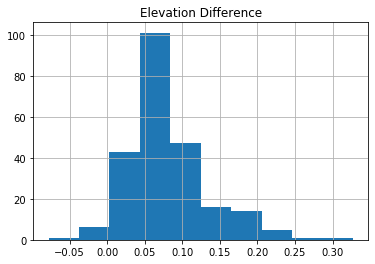

In [37]:
df.hist(column ="Elevation Difference")

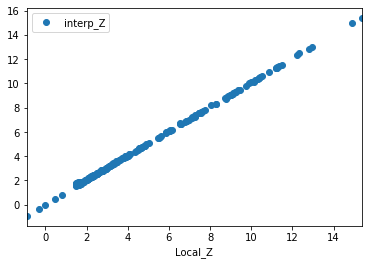

In [38]:
df.plot(x='Local_Z', y='interp_Z', style="o")

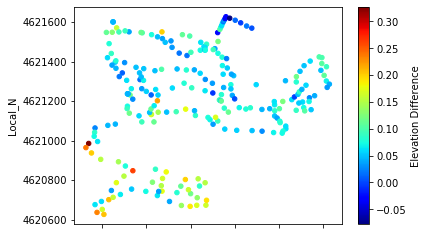

In [39]:
df.plot(kind='scatter', x='Local_E', y='Local_N', c="Elevation Difference", cmap= "jet")

In [40]:
dirn="c:/jhigh/Projects/"
fn2="transects_greatmarsh_rtk_edited2_with_Classification.csv"
print(dirn + fn2)
fullpathn2 = dirn + fn2

c:/jhigh/Projects/transects_greatmarsh_rtk_edited2_with_Classification.csv


In [41]:
df2= pd.read_csv(fullpathn2, header=0, skiprows=0, delimiter=",")
print("Read: ", len(df2.index), "lines.")
df2

Read:  235 lines.


,Point ID,Local_N,Local_E,Local_Z,interp_Z,Classification
0,5,4621601.180,385924.0487,2.8989,2.95700,6
1,6,4621600.720,385924.4364,2.9419,2.98500,6
2,7,4621600.740,385924.4032,2.9379,2.98300,6
3,8,4621570.795,385932.4255,3.4181,3.57900,5
4,9,4621550.622,385960.5784,2.1262,2.16500,5
5,10,4621545.638,385990.3527,2.2740,2.37520,5
6,11,4621536.262,386011.5767,1.9830,2.06120,5
7,12,4621525.232,386025.0516,3.9320,3.97920,5
8,13,4621516.255,386036.1507,2.4860,2.52230,5
9,14,4621504.708,386055.4914,1.4830,1.51630,5


In [42]:
df2["Classification"]

0      6
1      6
2      6
3      5
4      5
5      5
6      5
7      5
8      5
9      5
10     5
11     5
12     5
13     5
14     3
15     5
16     5
17     5
18     5
19     5
20     5
21     3
22     5
23     5
24     5
25     5
26     5
27     5
28     5
29     5
      ..
205    4
206    5
207    4
208    4
209    5
210    5
211    5
212    5
213    5
214    5
215    5
216    5
217    5
218    5
219    5
220    5
221    5
222    6
223    6
224    6
225    6
226    6
227    7
228    7
229    8
230    8
231    7
232    6
233    6
234    6
Name: Classification, Length: 235, dtype: int64

In [43]:
df2['Elevation Difference'] = df['interp_Z'] - df['Local_Z'] 
df2

,Point ID,Local_N,Local_E,Local_Z,interp_Z,Classification,Elevation Difference
0,5,4621601.180,385924.0487,2.8989,2.95700,6,0.05810
1,6,4621600.720,385924.4364,2.9419,2.98500,6,0.04310
2,7,4621600.740,385924.4032,2.9379,2.98300,6,0.04510
3,8,4621570.795,385932.4255,3.4181,3.57900,5,0.16090
4,9,4621550.622,385960.5784,2.1262,2.16500,5,0.03880
5,10,4621545.638,385990.3527,2.2740,2.37520,5,0.10120
6,11,4621536.262,386011.5767,1.9830,2.06120,5,0.07820
7,12,4621525.232,386025.0516,3.9320,3.97920,5,0.04720
8,13,4621516.255,386036.1507,2.4860,2.52230,5,0.03630
9,14,4621504.708,386055.4914,1.4830,1.51630,5,0.03330


In [44]:
x = df2["Elevation Difference"].values
x

array([ 0.0581 ,  0.0431 ,  0.0451 ,  0.1609 ,  0.0388 ,  0.1012 ,
        0.0782 ,  0.0472 ,  0.0363 ,  0.0333 ,  0.0496 ,  0.0336 ,
        0.0198 ,  0.0189 ,  0.096  ,  0.0735 ,  0.0375 ,  0.0627 ,
        0.0872 ,  0.0393 ,  0.0755 ,  0.0817 ,  0.0227 ,  0.0711 ,
        0.0542 ,  0.0605 ,  0.0475 ,  0.077  ,  0.0522 ,  0.0428 ,
        0.0359 ,  0.0309 ,  0.0587 ,  0.0415 ,  0.0834 ,  0.048  ,
        0.1018 ,  0.05   ,  0.0509 ,  0.0501 ,  0.0302 ,  0.0498 ,
        0.038  ,  0.045  ,  0.0113 ,  0.0215 ,  0.0626 ,  0.0165 ,
        0.0628 ,  0.0606 ,  0.0813 ,  0.0895 ,  0.0655 , -0.0054 ,
        0.082  ,  0.0405 ,  0.0969 ,  0.0939 ,  0.0519 ,  0.0842 ,
        0.1144 ,  0.0701 ,  0.0791 ,  0.084  ,  0.044  ,  0.0439 ,
        0.0667 ,  0.0635 ,  0.1235 ,  0.0617 , -0.0018 ,  0.051  ,
        0.0869 ,  0.0447 ,  0.0585 ,  0.0824 ,  0.0464 ,  0.1171 ,
        0.0502 ,  0.0505 ,  0.061  ,  0.1009 ,  0.0999 ,  0.1068 ,
        0.0924 ,  0.0496 ,  0.1088 ,  0.0701 ,  0.0412 ,  0.03

In [45]:
y = df2["Local_Z"].values
y

array([ 2.8989,  2.9419,  2.9379,  3.4181,  2.1262,  2.274 ,  1.983 ,
        3.932 ,  2.486 ,  1.483 ,  4.8104,  6.886 ,  8.263 ,  8.999 ,
       10.421 ,  8.271 ,  6.048 ,  7.5433,  9.217 ,  8.836 ,  7.463 ,
        6.764 ,  7.125 , 10.4   , 11.22  ,  9.017 ,  9.431 , 11.36  ,
        9.372 ,  6.1462,  4.4101,  3.918 ,  8.736 , 10.34  ,  9.1306,
        6.962 ,  4.553 ,  5.48  ,  2.725 ,  2.3359,  2.0318,  2.656 ,
        3.99  ,  4.595 ,  2.94  ,  5.513 ,  6.592 , 10.12  , 11.49  ,
        3.769 ,  5.04  ,  6.5935, 11.26  , 15.37  , 14.874 , 12.95  ,
       10.84  , 10.53  , 10.36  ,  2.931 ,  1.938 ,  3.859 ,  2.069 ,
        3.146 ,  2.774 ,  4.122 ,  2.001 ,  3.0295,  2.321 ,  2.2943,
        4.564 ,  2.721 ,  4.619 ,  2.464 ,  2.3015,  2.052 ,  3.126 ,
        2.144 ,  3.1218,  2.365 ,  3.319 ,  7.633 ,  7.444 ,  6.5192,
        5.846 ,  2.969 ,  1.887 ,  1.958 ,  4.508 ,  1.672 ,  4.8189,
        3.91  ,  2.576 ,  4.5984,  2.09  ,  2.09  ,  1.582 ,  3.88  ,
        6.0318,  3.3

In [46]:
z = df2["Classification"].values
z

array([6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 0,
       5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 7, 7, 8, 8, 7, 6, 6, 6], dtype=int64)

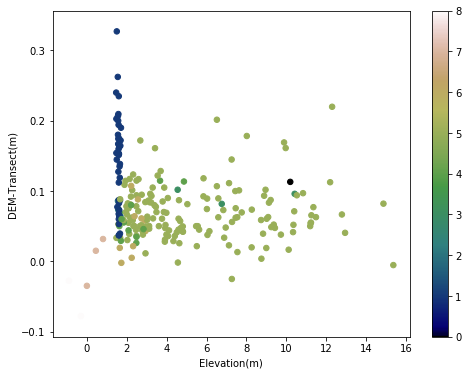

In [47]:
#TODO bigger dots,better colormap, and change color bar into a discrete (blocks) color bar instead of continuous (google around)
plt.figure(figsize=(8,6))
plt.scatter(y, x, 30, z, cmap="gist_earth")
plt.colorbar()
plt.xlabel("Elevation(m)")
plt.ylabel("DEM-Transect(m)")
plt.savefig("DEM-Transect_vs_Elev_Scatter_Plot.png")

In [48]:
df2["Elevation Difference"].loc[df2["Classification"]==1].mean()

0.14327186046511625

In [49]:
df2["Elevation Difference"].loc[df2["Classification"]==1].describe()

count    43.000000
mean      0.143272
std       0.065538
min       0.036900
25%       0.084615
50%       0.153540
75%       0.177645
max       0.327100
Name: Elevation Difference, dtype: float64

In [50]:
classes = {0:"Target",
           1:"Salt Marsh Grass",
           2:"Dirt or Vegetated Road",
           3:"Dark Dune Vegetation",
           4:"Sand(sandy road)",
           5:"Sand(dunes)",
           6:"Sand(beach)",
           7:"Wet Sand",
           8:"Submerged Sand",
          }
classes

{0: 'Target',
 1: 'Salt Marsh Grass',
 2: 'Dirt or Vegetated Road',
 3: 'Dark Dune Vegetation',
 4: 'Sand(sandy road)',
 5: 'Sand(dunes)',
 6: 'Sand(beach)',
 7: 'Wet Sand',
 8: 'Submerged Sand'}

0 Target
count    1.00000
mean     0.11299
std          NaN
min      0.11299
25%      0.11299
50%      0.11299
75%      0.11299
max      0.11299
Name: Elevation Difference, dtype: float64
rmse= 0.11298999999999992
1 Salt Marsh Grass
count    43.000000
mean      0.143272
std       0.065538
min       0.036900
25%       0.084615
50%       0.153540
75%       0.177645
max       0.327100
Name: Elevation Difference, dtype: float64
rmse= 0.1572329382691304
2 Dirt or Vegetated Road
count    3.000000
mean     0.074463
std      0.010925
min      0.064190
25%      0.068725
50%      0.073260
75%      0.079600
max      0.085940
Name: Elevation Difference, dtype: float64
rmse= 0.07499570498813032
3 Dark Dune Vegetation
count    3.000000
mean     0.093167
std      0.010345
min      0.081700
25%      0.088850
50%      0.096000
75%      0.098900
max      0.101800
Name: Elevation Difference, dtype: float64
rmse= 0.09354879297279473
4 Sand(sandy road)
count    14.000000
mean      0.060861
std       0.0275

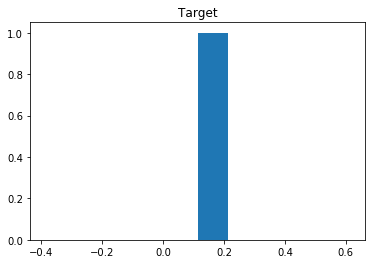

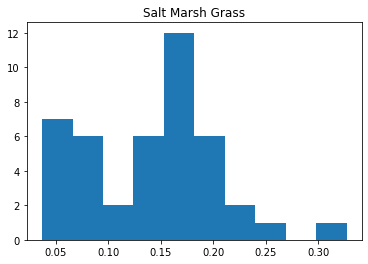

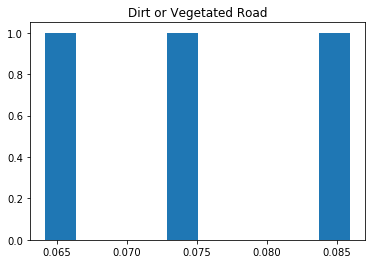

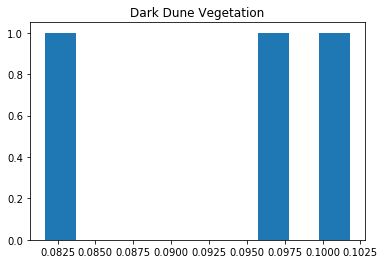

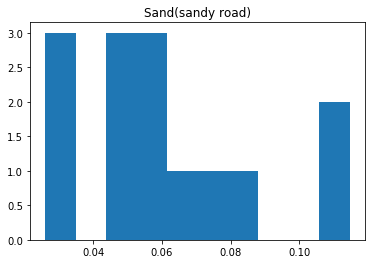

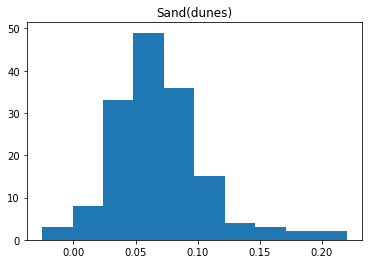

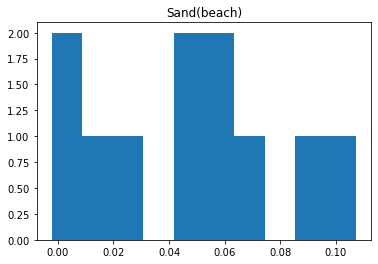

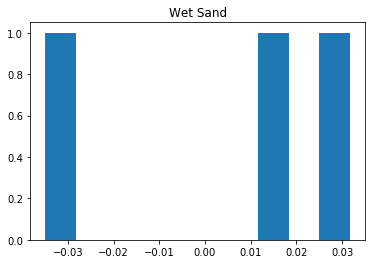

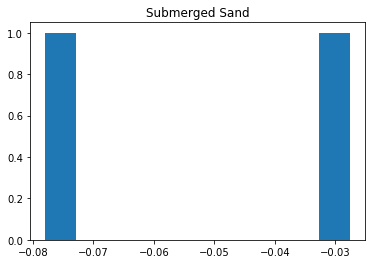

In [51]:
for i in range(0,9):
    print(i, classes[i])
    print(df2["Elevation Difference"].loc[df2["Classification"]==i].describe())
    val = df2["Elevation Difference"].loc[df2["Classification"]==i].values
    rmse=np.sqrt(np.mean(val**2))
    print("rmse=",rmse)
    plt.figure(figsize= (6,4))
    plt.hist(val)
    plt.title(classes[i])

In [52]:
pwd

'C:\\jhigh\\Source\\Learning_Python_in_Great_Marshes_Region'

In [55]:
dirn="c:/jhigh/Projects/"
fn3="transects_greatmarsh_rtk_edited3.csv"
print(dirn + fn3)
fullpathn3 = dirn + fn3

c:/jhigh/Projects/transects_greatmarsh_rtk_edited3.csv


In [56]:
df3 = pd.read_csv(fullpathn3, header=0, skiprows=0, delimiter=",")
print("Read: ", len(df3.index), "lines.")
df3

Read:  235 lines.


,Point ID,Local_N,Local_E,Local_Z,1mgrid_Z,BareEarth_Z,Classification
0,5,4621601.180,385924.0487,2.8989,2.95700,2.954,6
1,6,4621600.720,385924.4364,2.9419,2.98500,2.985,6
2,7,4621600.740,385924.4032,2.9379,2.98300,2.983,6
3,8,4621570.795,385932.4255,3.4181,3.57900,3.577,5
4,9,4621550.622,385960.5784,2.1262,2.16500,2.164,5
5,10,4621545.638,385990.3527,2.2740,2.37520,2.375,5
6,11,4621536.262,386011.5767,1.9830,2.06120,2.061,5
7,12,4621525.232,386025.0516,3.9320,3.97920,3.965,5
8,13,4621516.255,386036.1507,2.4860,2.52230,2.522,5
9,14,4621504.708,386055.4914,1.4830,1.51630,1.514,5


In [57]:
df3['Elevation Difference'] = df3['BareEarth_Z'] - df3['Local_Z'] 
df3

,Point ID,Local_N,Local_E,Local_Z,1mgrid_Z,BareEarth_Z,Classification,Elevation Difference
0,5,4621601.180,385924.0487,2.8989,2.95700,2.954,6,0.0551
1,6,4621600.720,385924.4364,2.9419,2.98500,2.985,6,0.0431
2,7,4621600.740,385924.4032,2.9379,2.98300,2.983,6,0.0451
3,8,4621570.795,385932.4255,3.4181,3.57900,3.577,5,0.1589
4,9,4621550.622,385960.5784,2.1262,2.16500,2.164,5,0.0378
5,10,4621545.638,385990.3527,2.2740,2.37520,2.375,5,0.1010
6,11,4621536.262,386011.5767,1.9830,2.06120,2.061,5,0.0780
7,12,4621525.232,386025.0516,3.9320,3.97920,3.965,5,0.0330
8,13,4621516.255,386036.1507,2.4860,2.52230,2.522,5,0.0360
9,14,4621504.708,386055.4914,1.4830,1.51630,1.514,5,0.0310


In [58]:
df3.describe()

,Point ID,Local_N,Local_E,Local_Z,1mgrid_Z,BareEarth_Z,Classification,Elevation Difference
count,235.000000,2.350000e+02,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,126.051064,4.621207e+06,386110.943208,4.331120,4.410966,4.401272,4.221277,0.070153
std,70.292228,2.601504e+02,148.778683,3.243622,3.237115,3.233730,1.685146,0.059491
min,5.000000,4.620627e+06,385862.809500,-0.900000,-0.927630,-0.929000,0.000000,-0.296000
25%,66.000000,4.621087e+06,385986.562550,1.698000,1.830970,1.828000,4.000000,0.037900
50%,126.000000,4.621231e+06,386108.424400,2.969000,3.018600,3.018000,5.000000,0.059000
75%,185.500000,4.621393e+06,386195.934950,6.332700,6.407500,6.403000,5.000000,0.092000
max,248.000000,4.621627e+06,386414.320800,15.370000,15.364600,15.348000,8.000000,0.325000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD48E435F8>]],
      dtype=object)

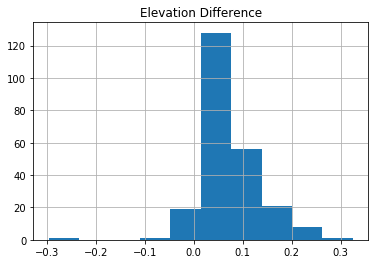

In [59]:
df3.hist(column="Elevation Difference")

In [60]:
y = df2["Elevation Difference"].values

In [61]:
x =df2["Local_Z"].values

In [62]:
z=df2["Classification"].values 